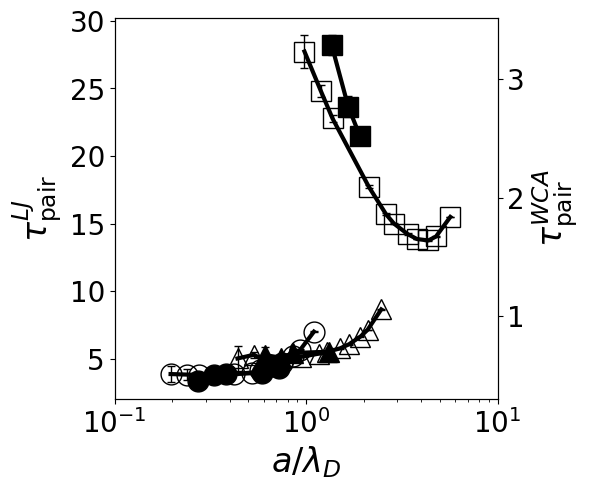

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "./"
x_path = f"{file_path}a_lambda_d.csv"
x_df = pd.read_csv(x_path)

def load_htfit(eps, model):
    f = f"{file_path}htfit_params_LD_{eps}_{model}.csv"
    df = pd.read_csv(f)
    return df["mean_tau_H"].values, df["mean_tau_H_err"].values

tau_mean, tau_err = {}, {}
for eps in ["0.2", "1", "5"]:
    eps_short = eps.replace(".", "")
    tau_mean[f"{eps_short}_lj"], tau_err[f"{eps_short}_lj"]   = load_htfit(eps, "LJ")
    tau_mean[f"{eps_short}_wca"], tau_err[f"{eps_short}_wca"] = load_htfit(eps, "WCA")

color_map = {'0.2': 'black', '1': 'black', '5': 'black'}
marker_map = {'0.2': 's', '1': '^', '5': 'o'}

fig, ax_l = plt.subplots(figsize=(6, 5))   # left y-axis
ax_r = ax_l.twinx()                         # right y-axis

# ===========================
#   LJ → LEFT Y-AXIS
# ===========================
for eps in ["0.2", "1", "5"]:
    eps_short = eps.replace(".", "")
    x = x_df[f"{eps}_LJ"]
    y = tau_mean[f"{eps_short}_lj"]
    yerr = tau_err[f"{eps_short}_lj"]
    
    ax_l.plot(x, y, color=color_map[eps], linestyle='-', linewidth=3, alpha=1)
    ax_l.errorbar(x, y, yerr=yerr,
        fmt=marker_map[eps], color=color_map[eps],
        mfc=color_map[eps], mec=color_map[eps], markersize=15,
        elinewidth=1, capsize=3, label=f"{eps} LJ"
    )

# ===========================
#   WCA → RIGHT Y-AXIS
# ===========================
for eps in ["0.2", "1", "5"]:
    eps_short = eps.replace(".", "")
    x = x_df[f"{eps}_WCA"]
    y = tau_mean[f"{eps_short}_wca"]
    yerr = tau_err[f"{eps_short}_wca"]
    
    ax_r.plot(x, y, color=color_map[eps], linestyle='-', linewidth=3, alpha=1)
    ax_r.errorbar(x, y, yerr=yerr,
        fmt=marker_map[eps], color=color_map[eps],
        mfc='none', mec=color_map[eps], markersize=15,
        elinewidth=1, capsize=3, label=f"{eps} WCA"
    )

# ===========================
#   Axes & Labels
# ===========================
ax_l.set_xlabel(r'${a}/{\lambda_D}$', fontsize=24)
ax_l.set_ylabel(r'$\tau_{\mathrm{pair}}^{LJ}$', fontsize=24, color='black')
ax_r.set_ylabel(r'$\tau_{\mathrm{pair}}^{WCA}$', fontsize=24, color='black')

ax_l.set_xscale("log")
ax_l.set_xlim(0.1, 10)
ax_l.tick_params(axis='both', labelsize=20)
ax_r.tick_params(axis='y', labelsize=20)

# ===========================
#   Legend (combined)
# ===========================
lines_l, labels_l = ax_l.get_legend_handles_labels()
lines_r, labels_r = ax_r.get_legend_handles_labels()
# ax_l.legend(lines_l + lines_r, labels_l + labels_r,
#             fontsize=14, frameon=False, loc='upper right')

plt.tight_layout()
plt.show()